In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from Helper import norm_list, to_dist_list

In [2]:
%matplotlib inline
sns.set(font_scale=1.10)
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
matplotlib.rcParams.update({'figure.autolayout': True})

raptor_dist = [0, 10241, 491582, 712794, 831695, 831695, 831695, 831695, 831695, 831695, 948446, 1032189, 1032189,
               1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189,
               1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189,
               1032189, 1032189, 1032189, 1032189, 1032189, 1048576]

In [3]:
def plot_max_possible_unique_packets_per_deg(n, seed_len=2):
    # calculate
    lst = []
    max_deg = 40
    for i in range(1, max_deg + 1):
        lst.append(math.comb(n, i))

    # Create a figure and the primary y-axis
    fig, ax1 = plt.subplots()

    # Plot the primary y-axis data
    ax1.plot(range(1, max_deg + 1), lst, label="Combinations", color="tab:blue")
    ax1.set_yscale("log")
    ax1.set_xlabel("Degree")
    ax1.set_ylabel("Packets")
    ax1.set_title("Number of Unique Packets per Degree")
    ax1.tick_params(axis="y", labelcolor="tab:blue")
    raptor_dist_func = norm_list(to_dist_list(raptor_dist))
    print(raptor_dist_func)

    possible_packets = math.pow(2, (seed_len * 8))
    res = [x * possible_packets for x in raptor_dist_func]
    ax1.plot(range(1, max_deg + 1), res[:max_deg], label="possible Packets (Raptor)", color="tab:cyan")
    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot the secondary y-axXis data
    ax2.plot(range(1, max_deg + 1), raptor_dist_func[:max_deg], label="Raptor Distribution", color="tab:red")
    ax2.set_ylabel("Probability")
    ax2.tick_params(axis="y", labelcolor="tab:red")
    # Combine legends from both axes
    # ax1.legend(loc="upper left")
    # ax2.legend(loc="upper right")
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax2.legend(lines, labels, loc="right")
    plt.autoscale()

    plt.savefig(f"max_unique_packets_per_deg_{n}_{seed_len}.svg", format="svg", dpi=1200)
    plt.savefig(f"max_unique_packets_per_deg_{n}_{seed_len}.pdf", bbox_inches="tight")
    plt.show(block=False)

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


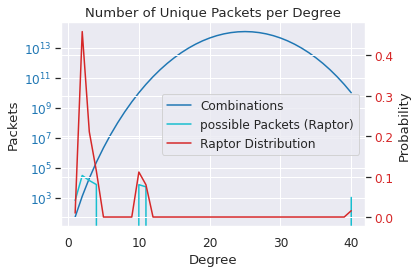

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


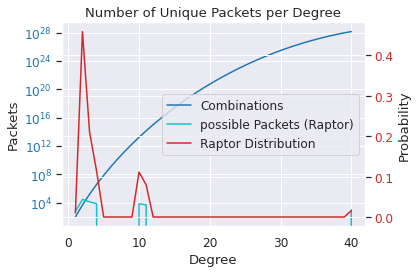

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


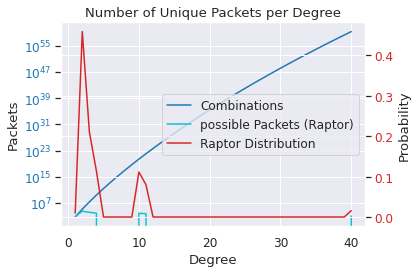

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


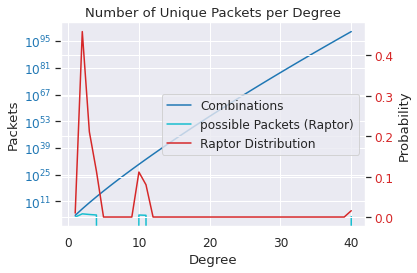

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


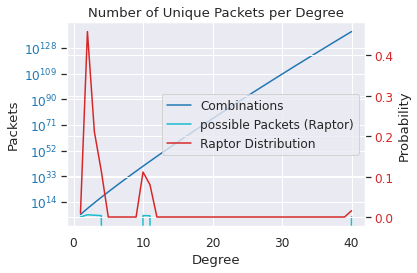

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


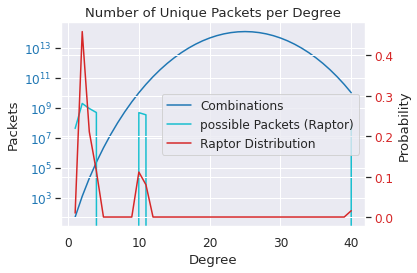

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


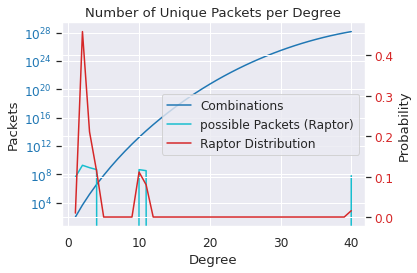

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


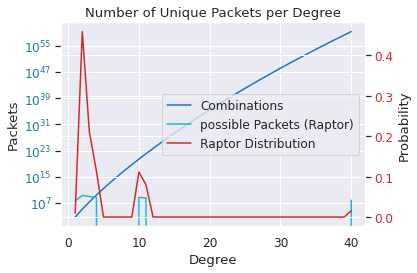

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


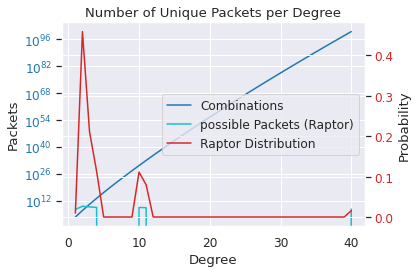

[0.009766578674316406, 0.4590425491333008, 0.21096420288085938, 0.11339282989501953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1113424301147461, 0.0798635482788086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562786102294922]


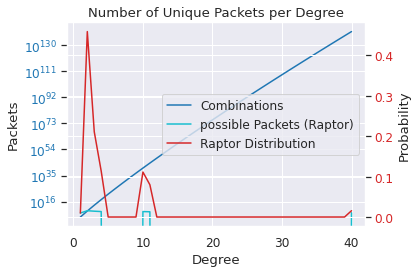

In [4]:
    plot_max_possible_unique_packets_per_deg(50)
    plot_max_possible_unique_packets_per_deg(100)
    plot_max_possible_unique_packets_per_deg(500)
    plot_max_possible_unique_packets_per_deg(5000)
    plot_max_possible_unique_packets_per_deg(50000)

    plot_max_possible_unique_packets_per_deg(50, 4)
    plot_max_possible_unique_packets_per_deg(100, 4)
    plot_max_possible_unique_packets_per_deg(500, 4)
    plot_max_possible_unique_packets_per_deg(5000, 4)
    plot_max_possible_unique_packets_per_deg(50000, 4)